# Exploratory Data Analysis (EDA) – Cardiovascular Risk

This notebook provides an initial exploratory analysis of the raw cardiovascular dataset.  
The goal is to understand the structure of the data and visualise key clinical and lifestyle variables before any cleaning or modelling steps.

In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(".."))

from src.data_prep import load_raw_data
from src.config import (
    NUMERIC_FOR_HIST,
    NUMERIC_FOR_BOXPLOT,
    CATEGORICAL_VARS,
    TARGET,
    CATEGORY_LABELS
)
from src.visualization import (
    plot_histograms,
    plot_categorical_bars,
    plot_numeric_vs_target,
    plot_correlation_matrix,
    plot_categorical_vs_target
)
from src.config import NUMERIC_FOR_HIST, CATEGORICAL_VARS, NUMERIC_FOR_BOXPLOT, TARGET

os.makedirs("../reports/figures", exist_ok=True)
os.makedirs("../reports/tables", exist_ok=True)

In [2]:
# Load raw data
df = load_raw_data("../data/raw/cardio_train.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Structural summary
print("Shape:", df.shape)
df.info()

stats = df.describe().T
stats.to_csv("../reports/tables/eda_summary.csv")
stats

Shape: (70000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


**Note**: Blood pressure histograms use clinical visualization limits to avoid distortion from extreme raw values.

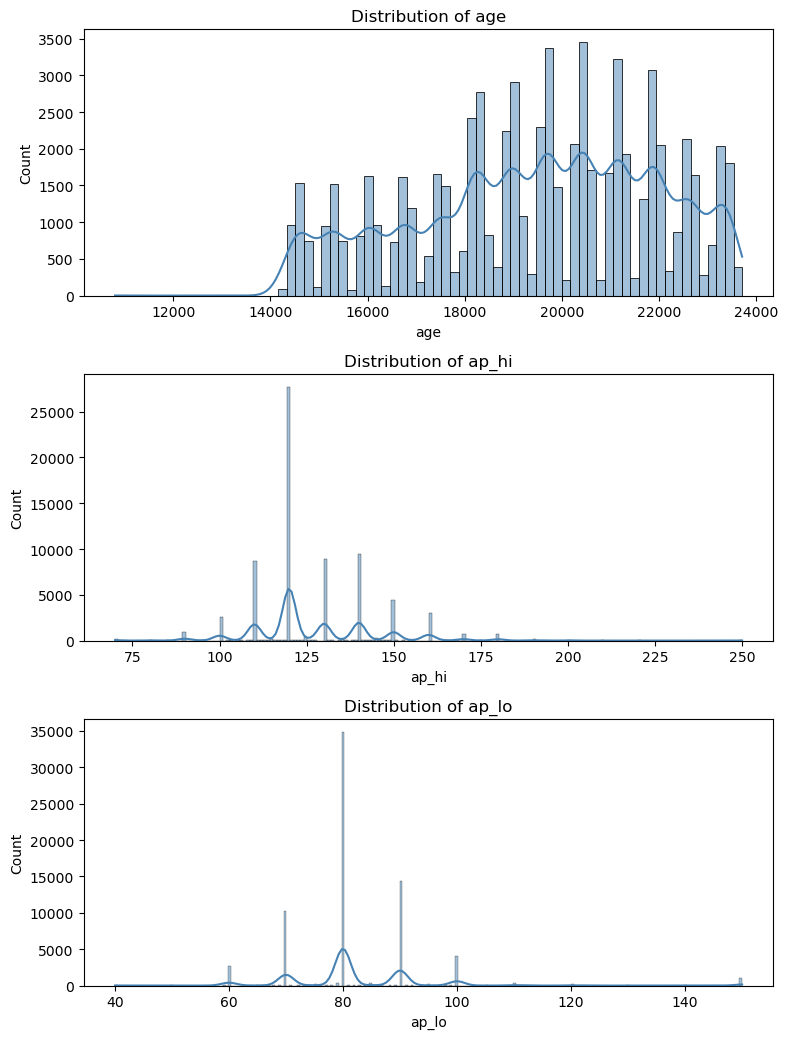

In [4]:
# Histograms
fig = plot_histograms(df, NUMERIC_FOR_HIST)
fig.savefig("../reports/figures/eda_histograms.png", dpi=300)

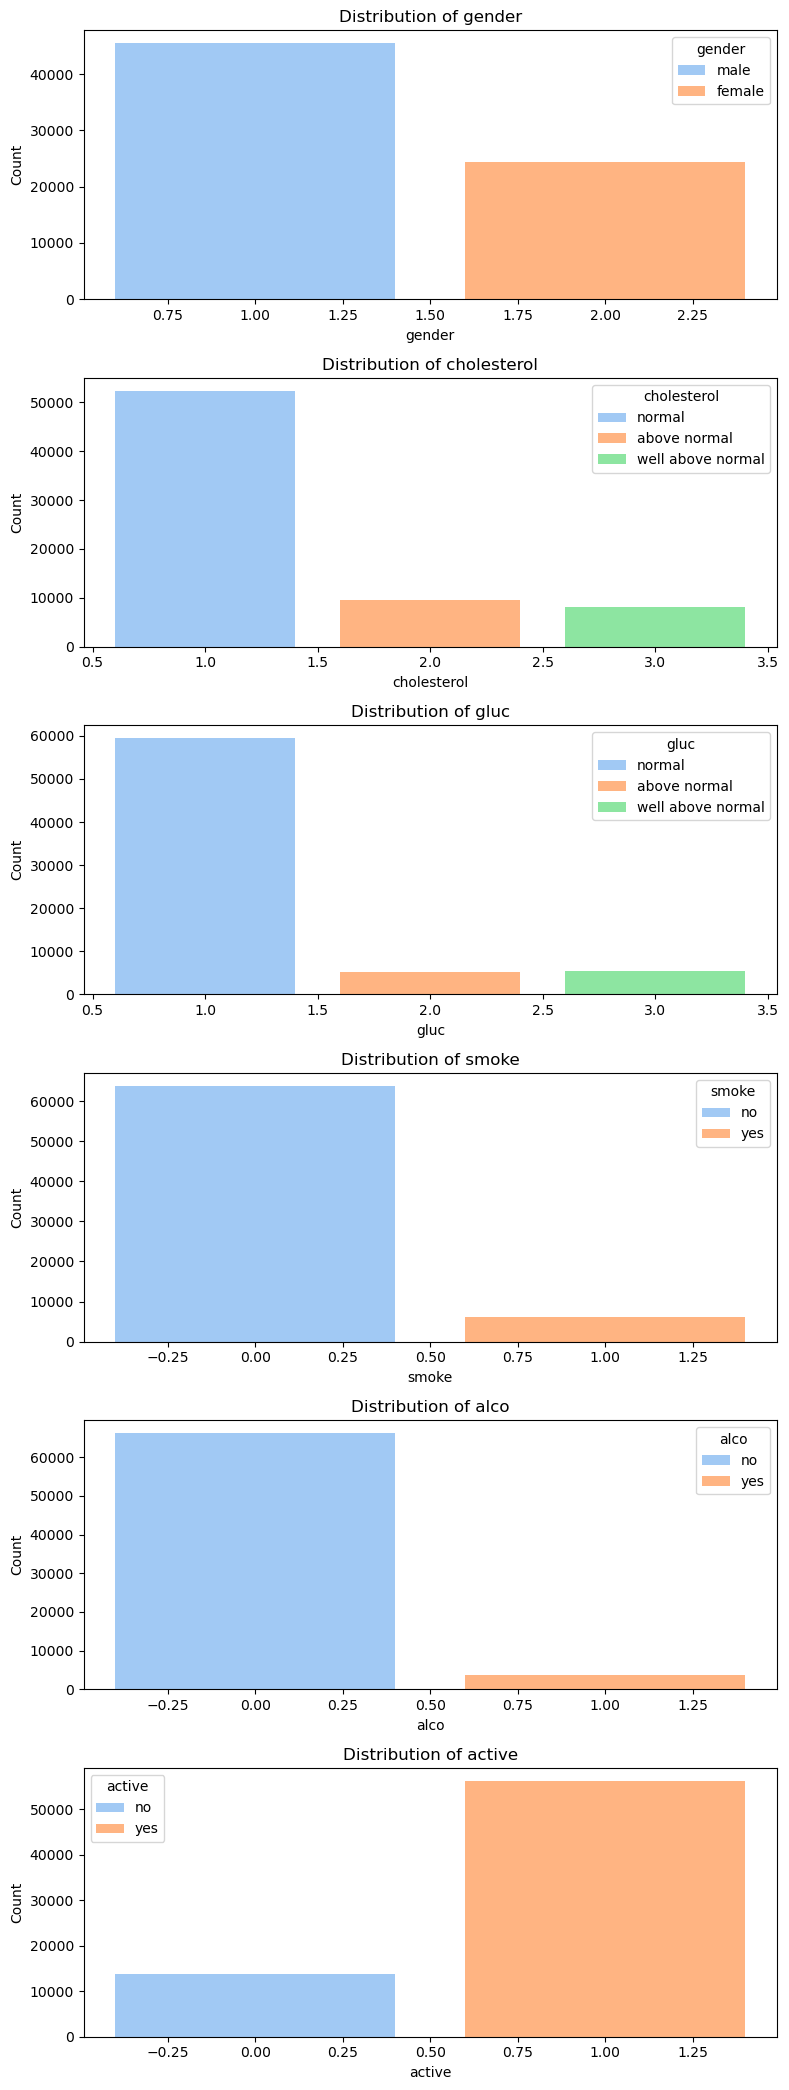

In [5]:
# Categorical distributions
fig = plot_categorical_bars(df, CATEGORICAL_VARS, CATEGORY_LABELS)
fig.savefig("../reports/figures/eda_categorical_bars.png", dpi=300)

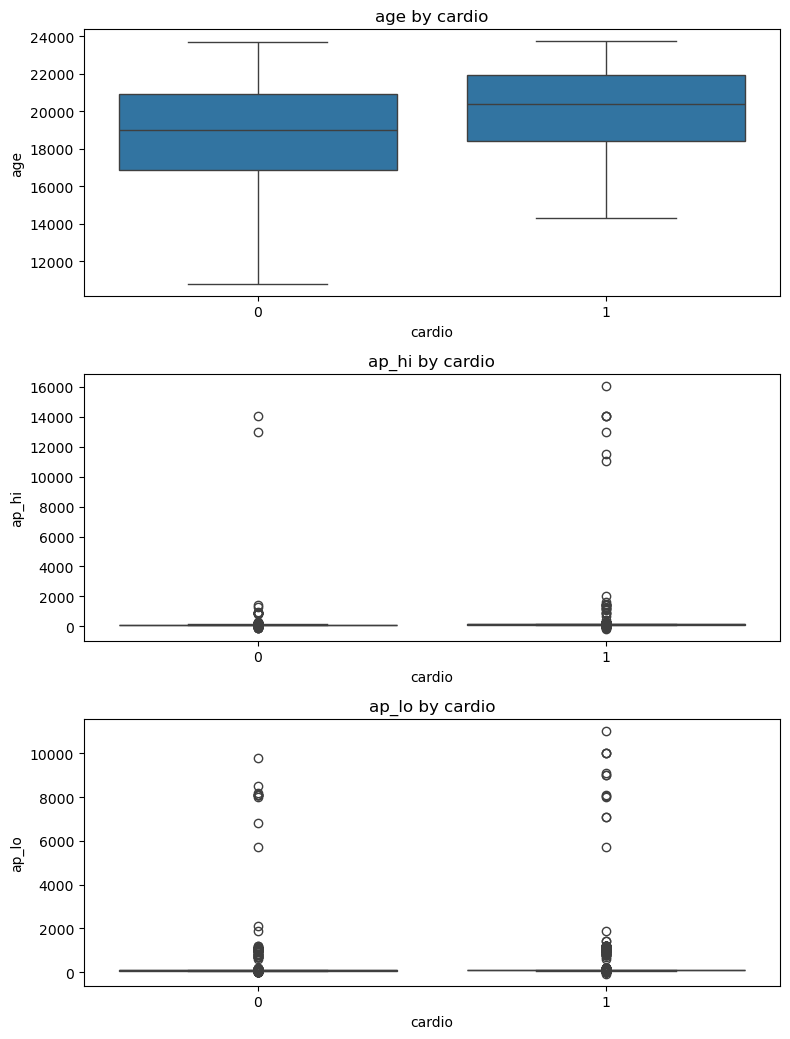

In [6]:
# Numeric vs target
fig = plot_numeric_vs_target(df, NUMERIC_FOR_BOXPLOT, TARGET)
fig.savefig("../reports/figures/eda_numeric_vs_target.png", dpi=300)

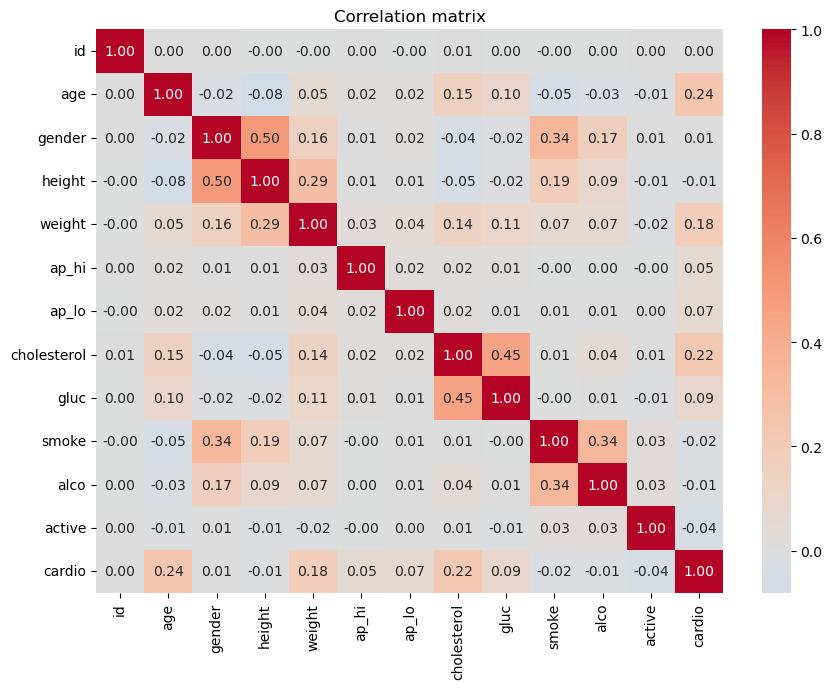

In [7]:
# Correlation matrix
fig, corr = plot_correlation_matrix(df)
fig.savefig("../reports/figures/eda_correlation_matrix.png", dpi=300)
corr.to_csv("../reports/tables/eda_correlation_matrix.csv")

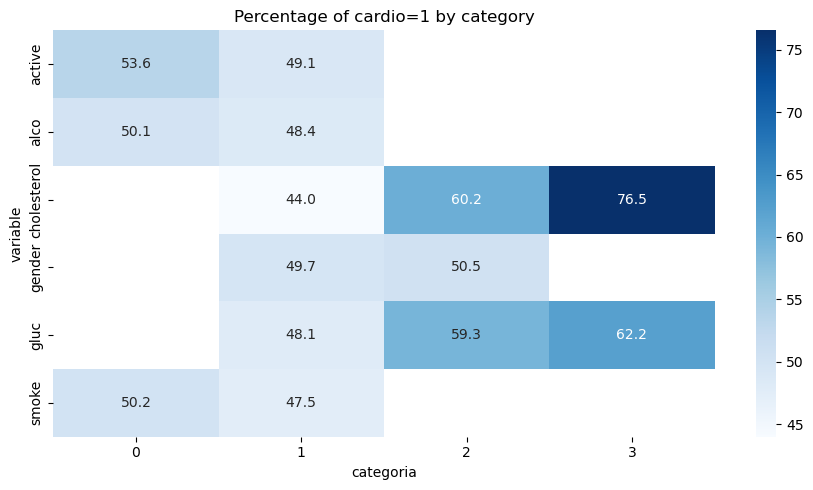

In [8]:
# Categorical vs target
fig, tabla = plot_categorical_vs_target(df, CATEGORICAL_VARS, TARGET)
fig.savefig("../reports/figures/eda_categorical_vs_target.png", dpi=300)
tabla.to_csv("../reports/tables/eda_categorical_vs_target.csv")